<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import math
#e = math.exp(1);

def model(ptt,Ka, Kb, Kc):
  return Kb + (2/0.031)*torch.log(Kc/ptt) - Ka/(3*(ptt**2))
  #return Kb - Ka/(3*(ptt**2))


In [ ]:
model(1,1,2,1)

In [158]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()


In [191]:
#t_c =100*[12,	4.50000000000000,	3.11111111111111,	2.62500000000000,	2.40000000000000,	2.27777777777778,	2.20408163265306,	2.15625000000000,	2.12345679012346,	2.10000000000000,	2.08264462809917,	2.06944444444444,	2.05917159763314,	2.05102040816327,	2.04444444444444,	2.03906250000000,	2.03460207612457,	2.03086419753086,	2.02770083102493,	2.02500000000000]
#t_u =100*[5,	1.25000000000000,	0.555555555555556,	0.312500000000000,	0.200000000000000,	0.138888888888889,	0.102040816326531,	0.0781250000000000,	0.0617283950617284,	0.0500000000000000,	0.0413223140495868,	0.0347222222222222,	0.0295857988165680,	0.0255102040816327,	0.0222222222222222,	0.0195312500000000,	0.0173010380622837,	0.0154320987654321,	0.0138504155124654,	0.0125000000000000]
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [185]:
import torch

Ka = torch.ones(())
Kb = torch.zeros(())
Kc = torch.ones(())

t_p = model(t_u, Ka, Kb, Kc)
t_p

tensor([ -103.8480,   -14.6097,    36.8417,  ..., -1130.5635, -1461.5205,
        -1850.6218])

In [186]:
loss = loss_fn(t_p, t_c)
loss

tensor(417007.5625)

In [162]:
delta = 0.1
loss_rate_of_change_Ka = \
(loss_fn(model(t_u, Ka + delta, Kb, Kc), t_c) -
loss_fn(model(t_u, Ka - delta, Kb, Kc), t_c)) / (2.0 * delta)

In [163]:
# In[9]:
learning_rate = 1e-2
Ka = Ka - learning_rate * loss_rate_of_change_Ka

loss_rate_of_change_Kb = \
(loss_fn(model(t_u, Ka, Kb + delta,Kc), t_c) -
loss_fn(model(t_u, Ka, Kb - delta,Kc), t_c)) / (2.0 * delta)
Kb = Kb - learning_rate * loss_rate_of_change_Kb

loss_rate_of_change_Kc = \
(loss_fn(model(t_u, Ka, Kb, Kc + delta), t_c) -
loss_fn(model(t_u, Ka, Kb, Kc - delta), t_c)) / (2.0 * delta)
Kc = Kc - learning_rate * loss_rate_of_change_Kc

In [164]:
Ka, Kb , Kc

(tensor(-10054.2197), tensor(0.), tensor(-6291455.))

In [165]:
# derivative of parameters
def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

def dmodel_dKa(t_u, Ka, Kb,Kc):
  return -1/(3*t_u**2)
# In[13]:
def dmodel_dKb(t_u, Ka, Kb,Kc):
  return 1.0

def dmodel_dKc(t_u, Ka, Kb,Kc):
  return 2/(0.031*Kc)

In [166]:
# In[14]:
def grad_fn(t_u, t_c, t_p, Ka, Kb, Kc):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dKa = dloss_dtp * dmodel_dKa(t_u, Ka, Kb, Kc)
  dloss_dKb = dloss_dtp * dmodel_dKb(t_u, Ka, Kb, Kc)
  dloss_dKc = dloss_dtp * dmodel_dKc(t_u, Ka, Kb, Kc)
  return torch.stack([dloss_dKa.sum(), dloss_dKb.sum(), dloss_dKc.sum()])  

In [200]:
#In[15]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None:
      params.grad.zero_()
    #Ka, Kb, Kc = params
    t_p = model(t_u, Ka, Kb, Kc)
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, Ka, Kb, Kc)
    
    params = params - learning_rate * grad
    
    if (epoch%1000 == 0):
      
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  
  return params

In [ ]:
import torch.optim as optim
dir(optim)

In [171]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [201]:
params = training_loop(
  n_epochs = 10000,
  learning_rate = 1e-2,
  params = torch.tensor([157600,   -200.5929,   1993.5204]),#157600,   -200.5929,   1993.5204 [100999.7656,   -209.7476,   1993.2222]
  t_u = t_u,
  t_c = t_c)

Epoch 1000, Loss 189.220612
Epoch 2000, Loss 189.220612
Epoch 3000, Loss 189.220612
Epoch 4000, Loss 189.220612
Epoch 5000, Loss 189.220612
Epoch 6000, Loss 189.220612
Epoch 7000, Loss 189.220612
Epoch 8000, Loss 189.220612
Epoch 9000, Loss 189.220612
Epoch 10000, Loss 189.220612


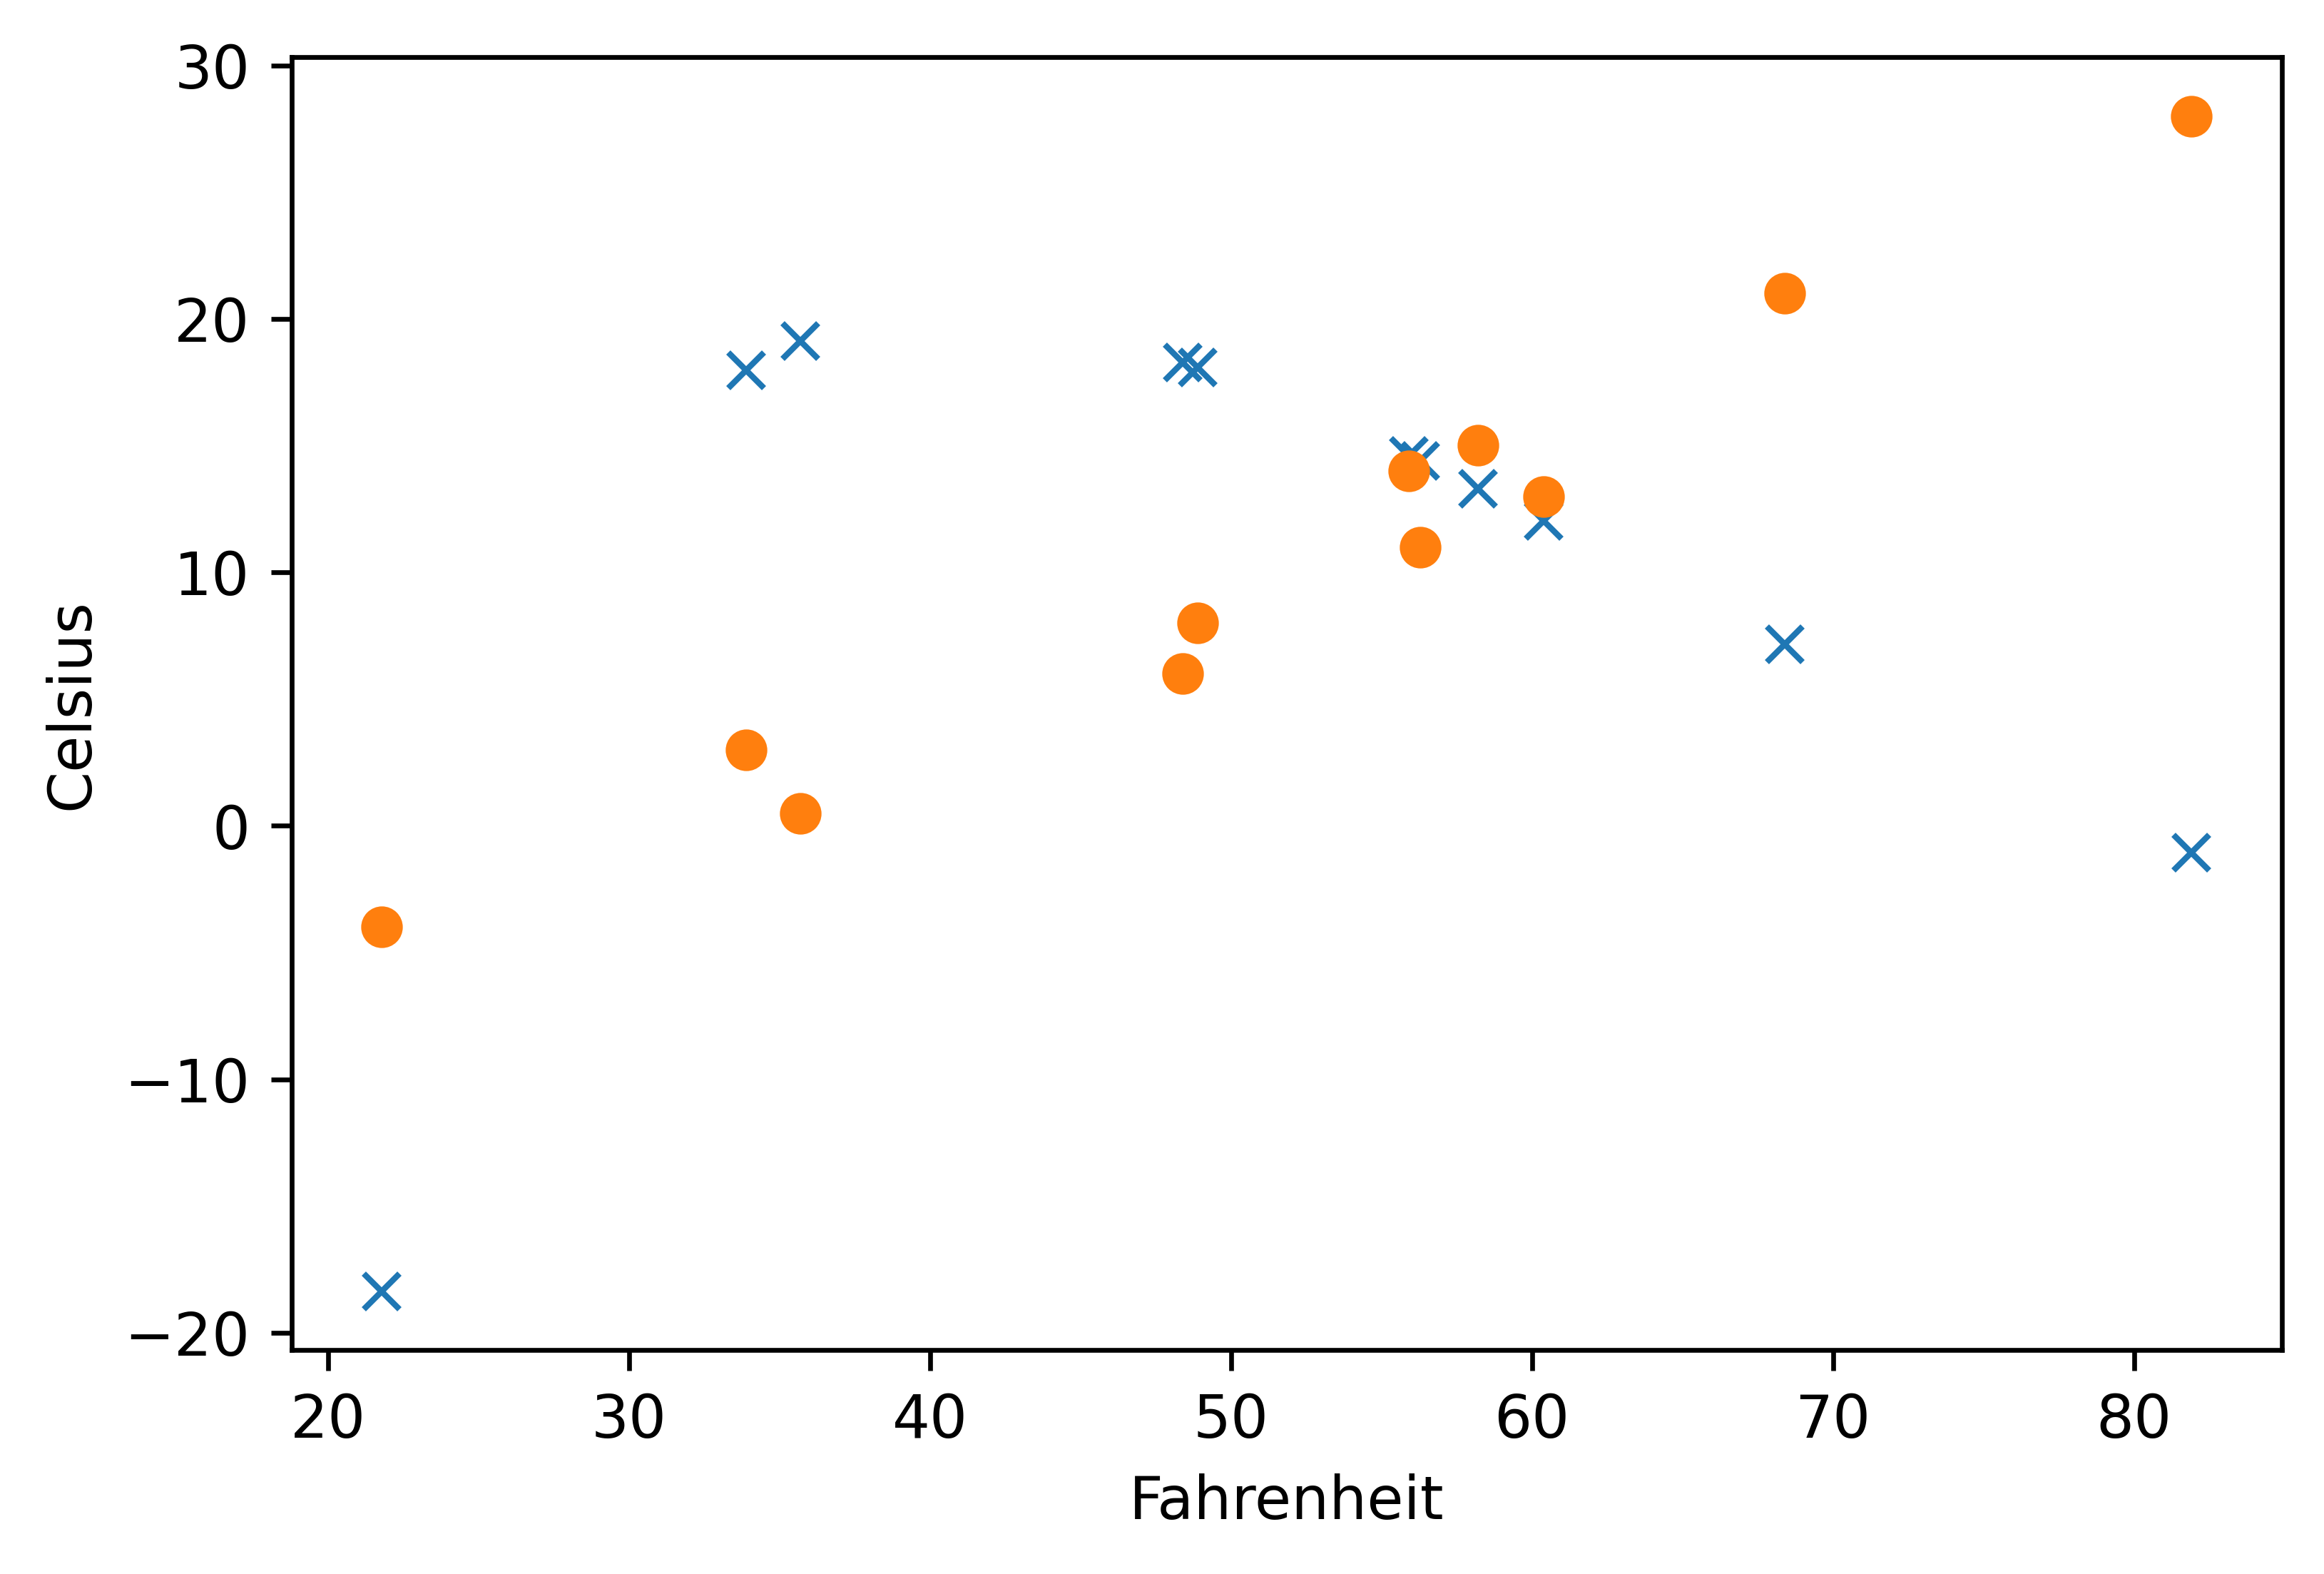

In [202]:
# In[22]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p = model(t_u, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")


plt.plot(t_u.numpy(), t_p.detach().numpy(),'x')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')